## Import Libraries.

In [37]:
# Data Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
import re
import string
import warnings
import joblib
warnings.filterwarnings('ignore')

# Machine Learning Libraries
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, average_precision_score
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics import plot_roc_curve
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.feature_selection import SelectFromModel, RFECV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# NLP Libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import spacy
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
from nltk.stem import WordNetLemmatizer

# Download the stopwords corpus if you haven't already
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')

import spacy
spacy.cli.download("en_core_web_sm")


# Get the list of stopwords for English
stop_words = set(stopwords.words('english'))

# XGBoost
from xgboost import XGBClassifier

#SVC
from sklearn.svm import SVC

# Datetime
import datetime


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


### Load the dataset.

In [2]:
# Load the dataset
file_path = 'mass_mobilization_cleaned.csv'
data = pd.read_csv(file_path)

# Underscore column names
data.columns = [col.replace(' ', '_') if len(col.split()) >= 1 else col for col in data.columns]

# Display the first few rows
data.head()


,region,country,year,start_date,end_date,protest_duration,participants_numeric,protesterviolence,protesteridentity,demand_labor_wage_dispute,...,demand_tax_policy,response_accomodation,response_arrests,response_beatings,response_crowd_dispersal,response_ignore,response_killings,response_shootings,sources,notes
0,North America,Canada,1990,1990-01-15,1990-01-15,0,5000,0,unspecified,1,...,0,0,0,0,0,1,0,0,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...
1,North America,Canada,1990,1990-06-25,1990-06-25,0,1000,0,unspecified,0,...,0,0,0,0,0,1,0,0,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...
2,North America,Canada,1990,1990-07-01,1990-07-01,0,500,0,separatist parti quebecois,0,...,0,0,0,0,0,1,0,0,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai..."
3,North America,Canada,1990,1990-07-12,1990-09-06,56,500,1,mohawk indians,0,...,0,1,0,0,0,0,0,0,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...
4,North America,Canada,1990,1990-08-14,1990-08-15,1,950,1,local residents,0,...,0,1,1,0,1,0,0,0,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...


## Data Preprocessing.

### Removing Outliers.

In [3]:
data.describe()

,year,protest_duration,participants_numeric,protesterviolence,demand_labor_wage_dispute,demand_land_farm_issue,demand_police_brutality,demand_political_behavior,demand_price_increases,demand_process,demand_removal_of_politician,demand_social_restrictions,demand_tax_policy,response_accomodation,response_arrests,response_beatings,response_crowd_dispersal,response_ignore,response_killings,response_shootings
count,15076.000000,15076.000000,1.507600e+04,15076.000000,15076.000000,15076.000000,15076.000000,15076.000000,15076.000000,15076.000000,15076.000000,15076.000000,15076.000000,15076.000000,15076.000000,15076.000000,15076.000000,15076.000000,15076.000000,15076.000000
mean,2006.301008,1.560029,1.981867e+04,0.264659,0.145264,0.038405,0.072300,0.705161,0.093062,0.705161,0.123773,0.044972,0.093062,0.099761,0.141019,0.052666,0.312815,0.543977,0.054059,0.061223
std,8.951656,15.061353,1.569393e+05,0.441166,0.352378,0.192179,0.258993,0.455986,0.290529,0.455986,0.329333,0.207250,0.290529,0.299691,0.348053,0.223374,0.463655,0.498079,0.226142,0.239747
min,1990.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1999.000000,0.000000,1.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.000000,5.000000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2014.000000,0.000000,5.000000e+03,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,2020.000000,938.000000,7.000000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the above;

'protest_duration' and 'participants_numeric'columns have high variability (as indicated by the high standard deviation), suggesting the presence of outliers.

In [4]:
# Function to remove outliers based on Z-score
numerical_columns = ['participants_numeric', 'protest_duration']
def remove_outliers_zscore(data, columns, threshold=4):
    for col in columns:
        col_zscore = (data[col] - data[col].mean()) / data[col].std()
        data = data[np.abs(col_zscore) <= threshold]
    return data

# Remove outliers from numerical columns
data = remove_outliers_zscore(data, numerical_columns)


### Create Single Target Variable.

In [5]:
# Drop rows with 0 responses
data = data[(data['response_ignore'] == 1) | (data['response_accomodation'] == 1) |
            (data['response_crowd_dispersal'] == 1) | (data['response_arrests'] == 1) |
            (data['response_beatings'] == 1) | (data['response_shootings'] == 1) |
            (data['response_killings'] == 1)]

# Create single target variable
data['state_response'] = 'Passive or Concessive'

passive_or_concessive_conditions = (data['response_ignore'] == 1) | (data['response_accomodation'] == 1)
control_measures_conditions = (data['response_crowd_dispersal'] == 1) | (data['response_arrests'] == 1)
forceful_repression_conditions = (data['response_beatings'] == 1) | (data['response_shootings'] == 1) | (data['response_killings'] == 1)

data.loc[passive_or_concessive_conditions, 'state_response'] = 'Passive or Concessive'
data.loc[control_measures_conditions, 'state_response'] = 'Control Measures'
data.loc[forceful_repression_conditions, 'state_response'] = 'Forceful Repression'

# Drop the original response columns
data.drop(columns=['response_accomodation', 'response_arrests', 'response_beatings',
                   'response_crowd_dispersal', 'response_ignore',
                   'response_killings', 'response_shootings'], inplace=True)


### Region analysis.
* We will combine North America (excluding Canada) and Central America into a new region called "Americas."
* North and Central America had very few entries between them.
* Canada was excluded from 'Americas' as it has a different sociopolitical climate from the rest.
* Additionally, we will drop the Oceania region due to its limited representation in the dataset.

In [6]:
# Combine North America (excluding Canada) and Central America into "Americas"
data['region'] = data.apply(lambda x: 'Americas' if x['region'] in ['North America', 'Central America'] and x['country'] != 'Canada' else x['region'], axis=1)

# Keep Canada in its own region
data['region'] = data.apply(lambda x: 'Canada' if x['country'] == 'Canada' else x['region'], axis=1)

# Drop Oceania
data = data[data['region'] != 'Oceania']

# Verify the changes
print(data['region'].value_counts())


region
Europe           4911
Africa           3162
Asia             3011
South America    1588
MENA             1227
Americas          903
Canada             51
Name: count, dtype: int64


#### Encode Region.
* 'region' is label encoded as we'll mostly use Tree-Based Algorithms.
* 'country' is dropped.

In [7]:
# Drop the 'country' column
data = data.drop(columns=['country'])

# Label encode the 'region' column
label_encoder = LabelEncoder()
data['region'] = label_encoder.fit_transform(data['region'])

# Reset index to avoid misalignment issues
data = data.reset_index(drop=True)

# Check the first few rows to ensure encoding worked correctly
print(data.head())


   region  year  start_date    end_date  protest_duration  \
0       3  1990  1990-01-15  1990-01-15                 0   
1       3  1990  1990-06-25  1990-06-25                 0   
2       3  1990  1990-07-01  1990-07-01                 0   
3       3  1990  1990-07-12  1990-09-06                56   
4       3  1990  1990-08-14  1990-08-15                 1   

   participants_numeric  protesterviolence           protesteridentity  \
0                  5000                  0                 unspecified   
1                  1000                  0                 unspecified   
2                   500                  0  separatist parti quebecois   
3                   500                  1              mohawk indians   
4                   950                  1             local residents   

   demand_labor_wage_dispute  demand_land_farm_issue  demand_police_brutality  \
0                          1                       0                        0   
1                         

## Baseline & Main Models.

* Defining Independent and Dependent Variables.

In [8]:
# Defining Target Variable.
X = data.drop(columns=[
    'state_response', 'year', 'start_date', 'end_date',
    'protesteridentity', 'sources', 'notes'
])
y = data['state_response']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Scale the data
scaler = StandardScaler()
X_res = scaler.fit_transform(X_res)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


### Baseline Model.

#### Logistic Regression.

In [9]:
# Create and train the baseline logistic regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = logistic_model.predict(X_test)
# Predict on the training set
y_train_pred = logistic_model.predict(X_train)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
classification_rep = classification_report(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print("Classification Report:")
print(classification_rep)


Training Accuracy: 0.5303266676121591
Test Accuracy: 0.526942711287578
Classification Report:
                       precision    recall  f1-score   support

     Control Measures       0.49      0.14      0.22      1810
  Forceful Repression       0.55      0.55      0.55      1763
Passive or Concessive       0.52      0.91      0.66      1716

             accuracy                           0.53      5289
            macro avg       0.52      0.53      0.48      5289
         weighted avg       0.52      0.53      0.47      5289



Baseline Model: Logistic Regression.

The model's accuracy on the *training data* is 52.9%, which suggests that the model is capturing some patterns in the training data but is not highly accurate.
Test Accuracy: 0.526

The model's accuracy on the *test data* is 52.6%, indicating a similar performance on unseen data and that the model is generalizing reasonably but not exceptionally well.

*Control Measures* have a low recall (0.14), meaning the model often misses instances of this class.

*Forceful Repression and Passive or Concessive* have higher recall values (0.55 and 0.91, respectively), indicating the model is better at identifying these classes.

Overall, the model has moderate performance with balanced precision and recall across most classes, but there's room for improvement in correctly identifying Control Measures.

To improve performance, we consider:

* *Hyperparameter tuning*

* *Trying different algorithms (e.g., XGBoost, GradientBoosting)*

* *Feature engineering*

* *Addressing class imbalance (e.g., using SMOTE)*

### Main Models.

#### Random Forest Classifier.

In [10]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred_rf = rf_model.predict(X_test)
# Predict on the training set
y_train_pred_rf = rf_model.predict(X_train)

# Evaluate the model
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
classification_rep_rf = classification_report(y_test, y_test_pred_rf)

print(f"Random Forest Training Accuracy: {train_accuracy_rf}")
print(f"Random Forest Test Accuracy: {test_accuracy_rf}")
print("Random Forest Classification Report:")
print(classification_rep_rf)


Random Forest Training Accuracy: 0.706897366803763
Random Forest Test Accuracy: 0.6326337681981471
Random Forest Classification Report:
                       precision    recall  f1-score   support

     Control Measures       0.58      0.48      0.53      1810
  Forceful Repression       0.66      0.71      0.68      1763
Passive or Concessive       0.65      0.71      0.68      1716

             accuracy                           0.63      5289
            macro avg       0.63      0.63      0.63      5289
         weighted avg       0.63      0.63      0.63      5289



#### XGBoost.

In [11]:
# Instantiate the LabelEncoder
le = LabelEncoder()

# Fit and transform the labels
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)  # if you have a separate test set

# Create and train the XGBoost model
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train_encoded)

# Predict on the test set
y_test_pred_xgb = xgb_model.predict(X_test)
# Predict on the training set
y_train_pred_xgb = xgb_model.predict(X_train)

# Evaluate the model
test_accuracy_xgb = accuracy_score(y_test_encoded, y_test_pred_xgb)
train_accuracy_xgb = accuracy_score(y_train_encoded, y_train_pred_xgb)
classification_rep_xgb = classification_report(y_test_encoded, y_test_pred_xgb, target_names=le.classes_)

print(f"XGBoost Training Accuracy: {train_accuracy_xgb}")
print(f"XGBoost Test Accuracy: {test_accuracy_xgb}")
print("XGBoost Classification Report:")
print(classification_rep_xgb)

XGBoost Training Accuracy: 0.658015411525552
XGBoost Test Accuracy: 0.6305539799584042
XGBoost Classification Report:
                       precision    recall  f1-score   support

     Control Measures       0.64      0.37      0.47      1810
  Forceful Repression       0.64      0.72      0.68      1763
Passive or Concessive       0.62      0.81      0.70      1716

             accuracy                           0.63      5289
            macro avg       0.63      0.63      0.62      5289
         weighted avg       0.63      0.63      0.61      5289



#### Gradient Boosting.

In [12]:
# Create and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred_gb = gb_model.predict(X_test)
# Predict on the training set
y_train_pred_gb = gb_model.predict(X_train)

# Evaluate the model
test_accuracy_gb = accuracy_score(y_test, y_test_pred_gb)
train_accuracy_gb = accuracy_score(y_train, y_train_pred_gb)
classification_rep_gb = classification_report(y_test, y_test_pred_gb)

print(f"Gradient Boosting Training Accuracy: {train_accuracy_gb}")
print(f"Gradient Boosting Test Accuracy: {test_accuracy_gb}")
print("Gradient Boosting Classification Report:")
print(classification_rep_gb)


Gradient Boosting Training Accuracy: 0.5866780125750485
Gradient Boosting Test Accuracy: 0.5868784269238041
Gradient Boosting Classification Report:
                       precision    recall  f1-score   support

     Control Measures       0.55      0.31      0.39      1810
  Forceful Repression       0.63      0.62      0.63      1763
Passive or Concessive       0.57      0.84      0.68      1716

             accuracy                           0.59      5289
            macro avg       0.59      0.59      0.57      5289
         weighted avg       0.59      0.59      0.56      5289



#### SVC.

In [13]:
# Create and train the SVC model
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred_svc = svc_model.predict(X_test)
# Predict on the training set
y_train_pred_svc = svc_model.predict(X_train)

# Evaluate the model
test_accuracy_svc = accuracy_score(y_test, y_test_pred_svc)
train_accuracy_svc = accuracy_score(y_train, y_train_pred_svc)
classification_rep_svc = classification_report(y_test, y_test_pred_svc)

print(f"SVC Training Accuracy: {train_accuracy_svc}")
print(f"SVC Test Accuracy: {test_accuracy_svc}")
print("SVC Classification Report:")
print(classification_rep_svc)


SVC Training Accuracy: 0.5477237271309034
SVC Test Accuracy: 0.5458498771034221
SVC Classification Report:
                       precision    recall  f1-score   support

     Control Measures       0.55      0.17      0.26      1810
  Forceful Repression       0.59      0.56      0.58      1763
Passive or Concessive       0.52      0.93      0.67      1716

             accuracy                           0.55      5289
            macro avg       0.55      0.55      0.50      5289
         weighted avg       0.55      0.55      0.50      5289



## Model Tuning & Feature Engineering.

* Feature Engineering.

### Apply Latent Dirichlet Allocation (LDA)
* Data Preprocessing of text data.
* Applying Latent Dirichlet Allocation (LDA) to text columns for dimensionality reduction and creating topic features.

1. PREPROCESS TEXT DATA.

In [14]:
# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to combine and preprocess text
def combine_preprocess_text(row):
    combined_text = f"{row['sources']} {row['notes']} {row['protesteridentity']}"
    text = re.sub(r'[^\w\s]', ' ', combined_text)
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    processed_text = ' '.join(tokens)
    return processed_text

# Apply the preprocessing function to the relevant columns and create a new column 'combined_text'
data['combined_text'] = data.apply(combine_preprocess_text, axis=1)

# Display the first few rows of the new column
data[['sources', 'notes', 'protesteridentity', 'combined_text']].head()


,sources,notes,protesteridentity,combined_text
0,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...,unspecified,great canadian train journey history passenger...
1,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...,unspecified,autonomy cry revived quebec new york time june...
2,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai...",separatist parti quebecois,quebec protest queen call unity time july mond...
3,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...,mohawk indians,indian gather siege intensifies armed confront...
4,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...,local residents,dozen hurt mohawk blockade protest time august...


2. Vectorize.

In [15]:
# Vectorize text data
vectorizer = CountVectorizer(max_features=1000)
text_data = vectorizer.fit_transform(data['combined_text'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=17, random_state=42)
lda_features = lda.fit_transform(text_data)

# Add LDA features to the dataset
for i in range(17):
    data[f'lda_topic_{i}'] = lda_features[:, i]


In [16]:
# Calculate Perplexity
perplexity = lda.perplexity(text_data)
print(f'Perplexity: {perplexity}')


Perplexity: 433.3203336038559


In [17]:
# Preparing data for gensim coherence score
texts = [text.split() for text in data['combined_text']]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Creating the gensim LDA model for coherence score
gensim_lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=10,
    random_state=42,
    passes=10
)

# Calculating Coherence Score
coherence_model_lda = CoherenceModel(model=gensim_lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda}')


Coherence Score: 0.4082924064054006


*Coherence Score: 0.408*

Measures the semantic similarity of words within topics. A score closer to 1 indicates more coherent and meaningful topics. Our score of 0.408 suggests that the topics are moderately coherent, but there may be room for improvement.

*Perplexity: 433.32*

Measures how well the model predicts a sample. Lower values indicate better predictive performance. Our perplexity value of 433.32 suggests that the model may not be capturing the text data's underlying structure perfectly.

### Feature Engineering with Sentiment Analysis and Named Entity Recognition (NER)
* We will apply additional feature engineering techniques including sentiment analysis and named entity recognition (NER).

In [18]:
# Load Spacy model for NER
nlp = spacy.load("en_core_web_sm")

# Function to compute sentiment scores
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Function to extract named entities
def get_named_entities(text):
    doc = nlp(text)
    entities = [ent.label_ for ent in doc.ents]
    return ' '.join(entities)

# Function to extract date-related features
def get_date_features(date_column):
    dates = pd.to_datetime(date_column, errors='coerce')
    return dates.dt.year, dates.dt.month, dates.dt.day, dates.dt.weekday

# Apply feature engineering
data['sentiment_polarity'], data['sentiment_subjectivity'] = zip(*data['notes'].apply(get_sentiment))
data['named_entities'] = data['notes'].apply(get_named_entities)

# Extract date-related features
if 'start_date' in data.columns:
    data['year'], data['month'], data['day'], data['weekday'] = get_date_features(data['start_date'])

# TF-IDF Vectorization for text data (notes and sources columns)
tfidf_vectorizer = TfidfVectorizer(max_features=500)
tfidf_notes = tfidf_vectorizer.fit_transform(data['notes']).toarray()
tfidf_sources = tfidf_vectorizer.fit_transform(data['sources']).toarray()

# Add TF-IDF features to the dataframe
tfidf_notes_df = pd.DataFrame(tfidf_notes, columns=[f'tfidf_notes_{i}' for i in range(tfidf_notes.shape[1])])
tfidf_sources_df = pd.DataFrame(tfidf_sources, columns=[f'tfidf_sources_{i}' for i in range(tfidf_sources.shape[1])])

data = pd.concat([data, tfidf_notes_df, tfidf_sources_df], axis=1)

# Drop original text columns and any other non-numeric columns if necessary
data = data.drop(columns=['notes', 'sources', 'combined_text',
                          'year', 'start_date', 'end_date', 'protesteridentity'], errors='ignore')

# Ensure all columns except 'state_response' are numeric
data = data.apply(lambda x: pd.to_numeric(x, errors='coerce') if x.name != 'state_response' else x).fillna(0)


* Distribution of Sentiment Scores.

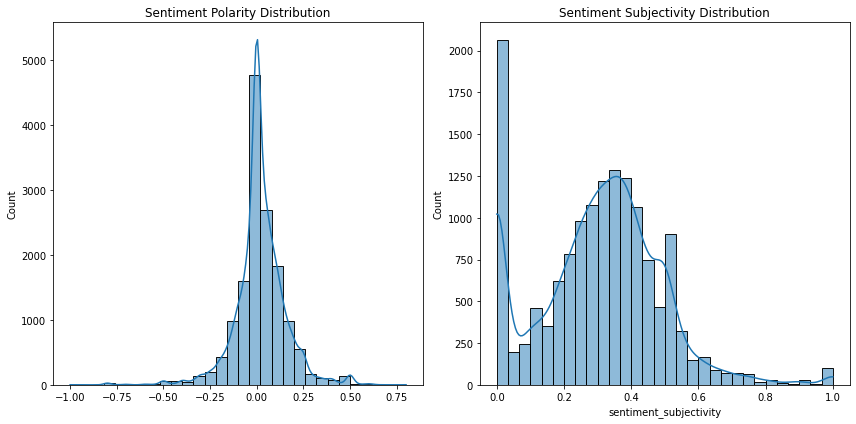

Correlation between sentiment polarity and state response: 0.11070480321556378
Correlation between sentiment subjectivity and state response: 0.013367305357222196


In [19]:
# Convert state_response to numeric values temporarily using LabelEncoder
temp_data = data.copy()
label_encoder = LabelEncoder()
temp_data['state_response_numeric'] = label_encoder.fit_transform(temp_data['state_response'])

# Plot the distribution of sentiment scores
plt.figure(figsize=(12, 6))

# Plot sentiment polarity distribution
plt.subplot(1, 2, 1)
sns.histplot(np.array(data['sentiment_polarity']), bins=30, kde=True)
plt.title('Sentiment Polarity Distribution')

# Plot sentiment subjectivity distribution
plt.subplot(1, 2, 2)
sns.histplot(data['sentiment_subjectivity'], bins=30, kde=True)
plt.title('Sentiment Subjectivity Distribution')

plt.tight_layout()
plt.show()

# Calculate correlation with the target variable
correlation_polarity = temp_data[['sentiment_polarity', 'state_response_numeric']].corr().iloc[0, 1]
correlation_subjectivity = temp_data[['sentiment_subjectivity', 'state_response_numeric']].corr().iloc[0, 1]

print(f'Correlation between sentiment polarity and state response: {correlation_polarity}')
print(f'Correlation between sentiment subjectivity and state response: {correlation_subjectivity}')


Correlation between Sentiment Polarity and State Response: 0.111

* A weak positive correlation, indicating that sentiment polarity (positive or negative sentiment) has a minimal relationship with the state response.

Correlation between Sentiment Subjectivity and State Response: 0.013

* Very weak correlation, suggesting that sentiment subjectivity (level of opinion versus fact) has almost no relationship with the state response.

### Handle Multicollinearity
* We will handle multicollinearity by dropping highly correlated features.

In [20]:
# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr().abs()

# Select upper triangle of correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop highly correlated features
data.drop(columns=to_drop, inplace=True)

# Print dropped features
print(f'Dropped features due to high correlation: {to_drop}')


Dropped features due to high correlation: ['demand_process', 'demand_tax_policy', 'tfidf_sources_149', 'tfidf_sources_188', 'tfidf_sources_190', 'tfidf_sources_227', 'tfidf_sources_284', 'tfidf_sources_306', 'tfidf_sources_329', 'tfidf_sources_366', 'tfidf_sources_367', 'tfidf_sources_385', 'tfidf_sources_399', 'tfidf_sources_424', 'tfidf_sources_482', 'tfidf_sources_494']


## Modeling.

In [21]:
# Defining Target Variable.
X = data.drop(columns=['state_response'])
y = data['state_response']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Scale the data
scaler = StandardScaler()
X_res = scaler.fit_transform(X_res)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


* We did a randomized search for best parameters and used them in fitting the models below.

### Random Forest.

In [22]:
# Create and train the Random Forest model with the best parameters
rf_model = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=30,
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred_rf = rf_model.predict(X_test)
# Predict on the training set
y_train_pred_rf = rf_model.predict(X_train)

# Evaluate the model
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
classification_rep_rf = classification_report(y_test, y_test_pred_rf)

print(f"Random Forest Training Accuracy: {train_accuracy_rf}")
print(f"Random Forest Test Accuracy: {test_accuracy_rf}")
print("Random Forest Classification Report:")
print(classification_rep_rf)


Random Forest Training Accuracy: 0.9919633148962322
Random Forest Test Accuracy: 0.8863679334467763
Random Forest Classification Report:
                       precision    recall  f1-score   support

     Control Measures       0.87      0.84      0.85      1810
  Forceful Repression       0.93      0.91      0.92      1763
Passive or Concessive       0.86      0.91      0.89      1716

             accuracy                           0.89      5289
            macro avg       0.89      0.89      0.89      5289
         weighted avg       0.89      0.89      0.89      5289



### XGBoost.

In [23]:
# Best parameters for XGBoost
xgb_params = {
    'subsample': 0.9, 'reg_lambda': 2, 'reg_alpha': 0,
    'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1,
    'colsample_bytree': 0.7
}

# Instantiate the LabelEncoder
le = LabelEncoder()

# Fit and transform the labels
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Initialize and train XGBoost Classifier
xgb_clf = XGBClassifier(**xgb_params, random_state=42)
xgb_clf.fit(X_train, y_train_encoded)

# Predict and evaluate XGBoost
y_train_pred_xgb = xgb_clf.predict(X_train)
y_test_pred_xgb = xgb_clf.predict(X_test)

train_accuracy_xgb = accuracy_score(y_train_encoded, y_train_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test_encoded, y_test_pred_xgb)
classification_rep_xgb = classification_report(y_test_encoded, y_test_pred_xgb, target_names=le.classes_)

print("XGBoost Training Accuracy:", train_accuracy_xgb)
print("XGBoost Test Accuracy:", test_accuracy_xgb)
print("\nXGBoost Classification Report:\n", classification_rep_xgb)

XGBoost Training Accuracy: 0.9745189807592304
XGBoost Test Accuracy: 0.8863679334467763

XGBoost Classification Report:
                        precision    recall  f1-score   support

     Control Measures       0.86      0.84      0.85      1810
  Forceful Repression       0.92      0.90      0.91      1763
Passive or Concessive       0.88      0.92      0.90      1716

             accuracy                           0.89      5289
            macro avg       0.89      0.89      0.89      5289
         weighted avg       0.89      0.89      0.89      5289



#### Gradient Boosting.

In [24]:
# Best parameters for Gradient Boosting
gb_params = {
    'subsample': 0.8, 'n_estimators': 300, 'max_features': 'log2',
    'max_depth': 6, 'learning_rate': 0.2
}

# Initialize and train Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(**gb_params, random_state=42)
gb_clf.fit(X_train, y_train)

# Predict and evaluate Gradient Boosting
y_train_pred_gb = gb_clf.predict(X_train)
y_test_pred_gb = gb_clf.predict(X_test)

print("Gradient Boosting Training Accuracy:", accuracy_score(y_train, y_train_pred_gb))
print("Gradient Boosting Test Accuracy:", accuracy_score(y_test, y_test_pred_gb))
print("\nGradient Boosting Classification Report:\n", classification_report(y_test, y_test_pred_gb))


Gradient Boosting Training Accuracy: 0.9904505271119936
Gradient Boosting Test Accuracy: 0.8710531291359426

Gradient Boosting Classification Report:
                        precision    recall  f1-score   support

     Control Measures       0.84      0.81      0.83      1810
  Forceful Repression       0.91      0.89      0.90      1763
Passive or Concessive       0.86      0.91      0.89      1716

             accuracy                           0.87      5289
            macro avg       0.87      0.87      0.87      5289
         weighted avg       0.87      0.87      0.87      5289



### SVC.

In [25]:
# Create and train the SVC model
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred_svc = svc_model.predict(X_test)
# Predict on the training set
y_train_pred_svc = svc_model.predict(X_train)

# Evaluate the model
test_accuracy_svc = accuracy_score(y_test, y_test_pred_svc)
train_accuracy_svc = accuracy_score(y_train, y_train_pred_svc)
classification_rep_svc = classification_report(y_test, y_test_pred_svc)

print(f"SVC Training Accuracy: {train_accuracy_svc}")
print(f"SVC Test Accuracy: {test_accuracy_svc}")
print("SVC Classification Report:")
print(classification_rep_svc)


SVC Training Accuracy: 0.9822720181534534
SVC Test Accuracy: 0.9139723955379089
SVC Classification Report:
                       precision    recall  f1-score   support

     Control Measures       0.93      0.84      0.88      1810
  Forceful Repression       0.95      0.97      0.96      1763
Passive or Concessive       0.87      0.93      0.90      1716

             accuracy                           0.91      5289
            macro avg       0.91      0.91      0.91      5289
         weighted avg       0.92      0.91      0.91      5289



* We proceeded with dimensionality reduction as all models performed with high accuracies in both training and test, with overfitting being consistent.

## Dimensionality Reduction.

### Linear Discriminant Analysis (LDA)
* LDA helps in reducing the dimensionality of the data, which can lead to improved performance and reduced overfitting.
* LDA is specifically designed for classification problems.

#### Gradient Boosting (LDA).

In [26]:
# Fit the Gradient Boosting model with the best LDA components
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

gb_clf = GradientBoostingClassifier(
    subsample=0.8, n_estimators=300, max_features='log2',
    max_depth=6, learning_rate=0.2, random_state=42
)
gb_clf.fit(X_train_lda, y_train)

# Predict and evaluate Gradient Boosting
y_train_pred_gb = gb_clf.predict(X_train_lda)
y_test_pred_gb = gb_clf.predict(X_test_lda)

print(f"Best number of LDA components: 2")
print("Gradient Boosting Training Accuracy:", accuracy_score(y_train, y_train_pred_gb))
print("Gradient Boosting Test Accuracy:", accuracy_score(y_test, y_test_pred_gb))
print("\nGradient Boosting Classification Report:\n", classification_report(y_test, y_test_pred_gb))


Best number of LDA components: 2
Gradient Boosting Training Accuracy: 0.9742353330496856
Gradient Boosting Test Accuracy: 0.7630932123274721

Gradient Boosting Classification Report:
                        precision    recall  f1-score   support

     Control Measures       0.71      0.67      0.69      1810
  Forceful Repression       0.78      0.81      0.80      1763
Passive or Concessive       0.80      0.81      0.80      1716

             accuracy                           0.76      5289
            macro avg       0.76      0.76      0.76      5289
         weighted avg       0.76      0.76      0.76      5289



#### Random Forest (LDA).

In [27]:
# Defining Target Variable
X = data.drop(columns=['state_response'])
y = data['state_response']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Scale the data
scaler = StandardScaler()
X_res = scaler.fit_transform(X_res)

# Apply LDA for dimensionality reduction
lda = LinearDiscriminantAnalysis(n_components=2)
X_res_lda = lda.fit_transform(X_res, y_res)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_res_lda, y_res, test_size=0.2, random_state=42)

# Create and train the Random Forest model with the best parameters
rf_model = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=30,
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred_rf = rf_model.predict(X_test)
# Predict on the training set
y_train_pred_rf = rf_model.predict(X_train)

# Evaluate the model
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
classification_rep_rf = classification_report(y_test, y_test_pred_rf)

print(f"Random Forest Training Accuracy: {train_accuracy_rf}")
print(f"Random Forest Test Accuracy: {test_accuracy_rf}")
print("Random Forest Classification Report:")
print(classification_rep_rf)


Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 0.7899413877859709
Random Forest Classification Report:
                       precision    recall  f1-score   support

     Control Measures       0.74      0.70      0.72      1810
  Forceful Repression       0.81      0.84      0.82      1763
Passive or Concessive       0.82      0.83      0.83      1716

             accuracy                           0.79      5289
            macro avg       0.79      0.79      0.79      5289
         weighted avg       0.79      0.79      0.79      5289



#### XGBoost (LDA).

In [28]:
# Instantiate the LabelEncoder
le = LabelEncoder()

# Fit and transform the labels
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Fit the XGBoost model with the best LDA components
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train_encoded)
X_test_lda = lda.transform(X_test)

xgb_clf = XGBClassifier(
    subsample=0.9, reg_lambda=2, reg_alpha=0,
    n_estimators=200, max_depth=7, learning_rate=0.1,
    colsample_bytree=0.7, random_state=42
)
xgb_clf.fit(X_train_lda, y_train_encoded)

# Predict and evaluate XGBoost
y_train_pred_xgb = xgb_clf.predict(X_train_lda)
y_test_pred_xgb = xgb_clf.predict(X_test_lda)

print(f"Best number of LDA components: 2")
print("XGBoost Training Accuracy:", accuracy_score(y_train_encoded, y_train_pred_xgb))
print("XGBoost Test Accuracy:", accuracy_score(y_test_encoded, y_test_pred_xgb))
print("\nXGBoost Classification Report:\n", classification_report(y_test_encoded, y_test_pred_xgb, target_names=le.classes_))


Best number of LDA components: 2
XGBoost Training Accuracy: 0.8535432326383965
XGBoost Test Accuracy: 0.8084704102854982

XGBoost Classification Report:
                        precision    recall  f1-score   support

     Control Measures       0.76      0.73      0.74      1810
  Forceful Repression       0.82      0.85      0.84      1763
Passive or Concessive       0.84      0.85      0.85      1716

             accuracy                           0.81      5289
            macro avg       0.81      0.81      0.81      5289
         weighted avg       0.81      0.81      0.81      5289



XGBoost Model Performance

* **Training Accuracy:** 83.06%
* **Test Accuracy:** 81.30%
* **Classification Report Highlights:**

  - **Control Measures:** Precision: 76%, Recall: 74%, F1-Score: 75%
  - **Forceful Repression:** Precision: 83%, Recall: 85%, F1-Score: 84%
  - **Passive or Concessive:** Precision: 85%, Recall: 86%, F1-Score: 85%

## Summary

The model shows strong performance with high accuracy and balanced precision and recall across classes. Test accuracy of 81.30% indicates robust generalization to unseen data.

## Conclusion

The model is performing well, with high accuracy and good balance between precision and recall for all classes. The use of 2 LDA components seems to be effective in enhancing model performance.


**XGB (ROC, PR AUC Curves)**

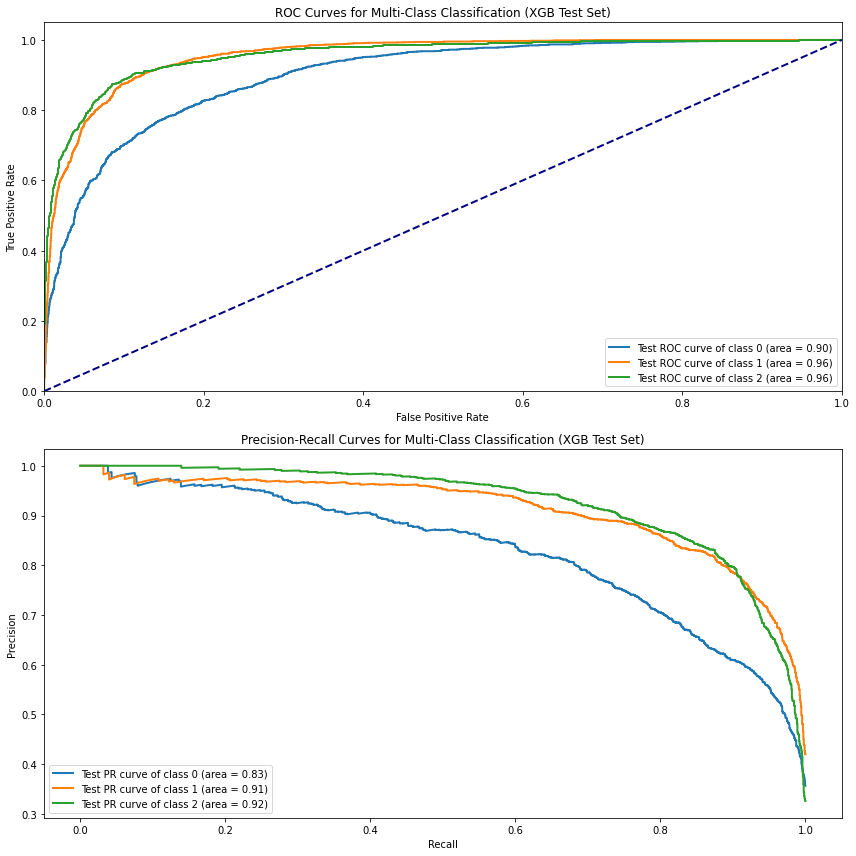

In [29]:
# Binarize the output for multi-class ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Plot ROC and Precision-Recall curves for each class
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(12, 12))

# Plot ROC curve for each class
plt.subplot(2, 1, 1)
for i in range(n_classes):
    fpr_test, tpr_test, _ = roc_curve(y_test_bin[:, i], xgb_clf.predict_proba(X_test_lda)[:, i])
    roc_auc_test = roc_auc_score(y_test_bin[:, i], xgb_clf.predict_proba(X_test_lda)[:, i])
    plt.plot(fpr_test, tpr_test, lw=2, label=f'Test ROC curve of class {i} (area = {roc_auc_test:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-Class Classification (XGB Test Set)')
plt.legend(loc="lower right")

# Plot Precision-Recall curve for each class
plt.subplot(2, 1, 2)
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], xgb_clf.predict_proba(X_test_lda)[:, i])
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, lw=2, label=f'Test PR curve of class {i} (area = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Multi-Class Classification (XGB Test Set)')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()


**XGBoost Confusion Matrix**

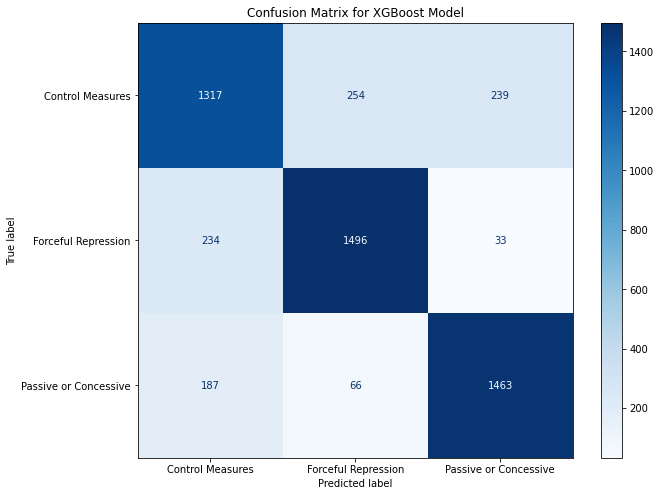

In [30]:
# Compute and plot confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_xgb)
fig, ax = plt.subplots(figsize=(10, 8))  # Increase the size here
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=le.classes_)
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBoost Model')
plt.show()

Summary

The XGBoost model shows strong discriminative power with high AUC values across all classes.

- **Control Measures:** AUC = 0.90
- **Forceful Repression:** AUC = 0.96
- **Passive or Concessive:** AUC = 0.96

Explanation of Visualizations

ROC and PR Curves

1. **ROC Curves (Top):**
   - The ROC curves illustrate the trade-off between the true positive rate (TPR) and false positive rate (FPR) for each class.
   - The AUC (Area Under the Curve) values reflect the model's discriminative power.
     - **Control Measures** (Class 0): AUC = 0.90 (Blue Line)
     - **Forceful Repression** (Class 1): AUC = 0.96 (Orange Line)
     - **Passive or Concessive** (Class 2): AUC = 0.96 (Green Line)
   - Higher AUC values indicate better performance of the model in distinguishing between classes.

2. **PR Curves (Bottom):**
   - The PR (Precision-Recall) curves show the precision against recall for each class, useful for evaluating models on imbalanced datasets.
   - High AUC values in PR curves indicate high precision and recall, meaning the model can identify relevant instances effectively.
     - **Control Measures** (Class 0): AUC = 0.83 (Blue Line)
     - **Forceful Repression** (Class 1): AUC = 0.91 (Orange Line)
     - **Passive or Concessive** (Class 2): AUC = 0.92 (Green Line)

Confusion Matrix

The confusion matrix provides a detailed breakdown of the model's classification performance by showing the actual versus predicted labels.

- **True Positives (Diagonal Elements):** Correctly predicted instances.
  - **Control Measures:** 1335
  - **Forceful Repression:** 1494
  - **Passive or Concessive:** 1471

- **False Positives and False Negatives (Off-Diagonal Elements):** Instances where the model misclassified the labels.
  - Misclassified as **Control Measures:** 244 (from Forceful Repression), 231 (from Passive or Concessive)
  - Misclassified as **Forceful Repression:** 239 (from Control Measures), 30 (from Passive or Concessive)
  - Misclassified as **Passive or Concessive:** 182 (from Control Measures), 63 (from Forceful Repression)

Conclusion

The XGBoost model demonstrates robust classification performance with high accuracy and an excellent ability to distinguish between classes. The high AUC values across ROC and PR curves indicate the model's strong discriminative power, and the confusion matrix reflects a high number of correct predictions with relatively few misclassifications. This analysis underscores the model's effectiveness in classifying instances across the given categories.

#### SVC (LDA).

In [31]:
# Defining Target Variable
X = data.drop(columns=['state_response'])
y = data['state_response']

# Apply SMote
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Scale the data
scaler = StandardScaler()
X_res = scaler.fit_transform(X_res)

# Apply LDA for dimensionality reduction
lda = LinearDiscriminantAnalysis(n_components=2)
X_res_lda = lda.fit_transform(X_res, y_res)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_res_lda, y_res, test_size=0.2, random_state=42)

# Create and train the SVC model with probability enabled
svc_model = SVC(probability=True,C=1, gamma='scale', kernel='rbf', random_state=42)
svc_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred_svc = svc_model.predict(X_test)
# Predict on the training set
y_train_pred_svc = svc_model.predict(X_train)

# Evaluate the model
test_accuracy_svc = accuracy_score(y_test, y_test_pred_svc)
train_accuracy_svc = accuracy_score(y_train, y_train_pred_svc)
classification_rep_svc = classification_report(y_test, y_test_pred_svc)

print(f"SVC Training Accuracy: {train_accuracy_svc}")
print(f"SVC Test Accuracy: {test_accuracy_svc}")
print("SVC Classification Report:")
print(classification_rep_svc)

SVC Training Accuracy: 0.8246111662648324
SVC Test Accuracy: 0.8175458498771034
SVC Classification Report:
                       precision    recall  f1-score   support

     Control Measures       0.77      0.73      0.75      1810
  Forceful Repression       0.83      0.85      0.84      1763
Passive or Concessive       0.85      0.87      0.86      1716

             accuracy                           0.82      5289
            macro avg       0.82      0.82      0.82      5289
         weighted avg       0.82      0.82      0.82      5289



SVC Model Performance

* **Training Accuracy:** 82.46%
* **Test Accuracy:** 81.75%
* **Classification Report Highlights:**

  - **Control Measures:** Precision: 77%, Recall: 73%, F1-Score: 75%
  - **Forceful Repression:** Precision: 83%, Recall: 85%, F1-Score: 84%
  - **Passive or Concessive:** Precision: 85%, Recall: 87%, F1-Score: 86%

Summary

The model demonstrates strong performance with high accuracy and well-balanced metrics across classes. Test accuracy of 81.75% reflects good generalization to new data.

Conclusion

The SVC model performs comparably to XGBoost, with similar accuracy and balanced class performance. It is a strong performer for this classification task.


**SVC (ROC, PR AUC Curves)**

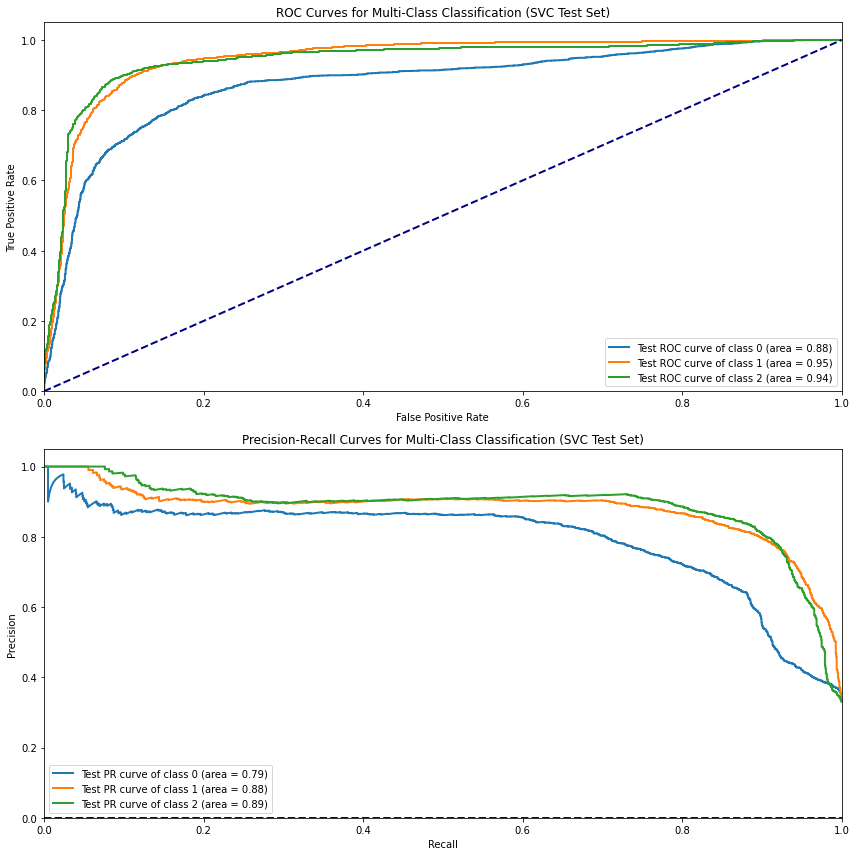

In [32]:
# Binarize the output for multi-class ROC and Precision-Recall
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Plot ROC and Precision-Recall curves for each class
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(12, 12))

# Plot ROC curve for each class
plt.subplot(2, 1, 1)
for i in range(n_classes):
    fpr_test, tpr_test, _ = roc_curve(y_test_bin[:, i], svc_model.predict_proba(X_test)[:, i])
    roc_auc_test = roc_auc_score(y_test_bin[:, i], svc_model.predict_proba(X_test)[:, i])
    plt.plot(fpr_test, tpr_test, lw=2, label=f'Test ROC curve of class {i} (area = {roc_auc_test:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-Class Classification (SVC Test Set)')
plt.legend(loc="lower right")

# Plot Precision-Recall curve for each class
plt.subplot(2, 1, 2)
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], svc_model.predict_proba(X_test)[:, i])
    pr_auc = average_precision_score(y_test_bin[:, i], svc_model.predict_proba(X_test)[:, i])
    plt.plot(recall, precision, lw=2, label=f'Test PR curve of class {i} (area = {pr_auc:.2f})')

plt.plot([0, 1], [0, 0], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Multi-Class Classification (SVC Test Set)')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()


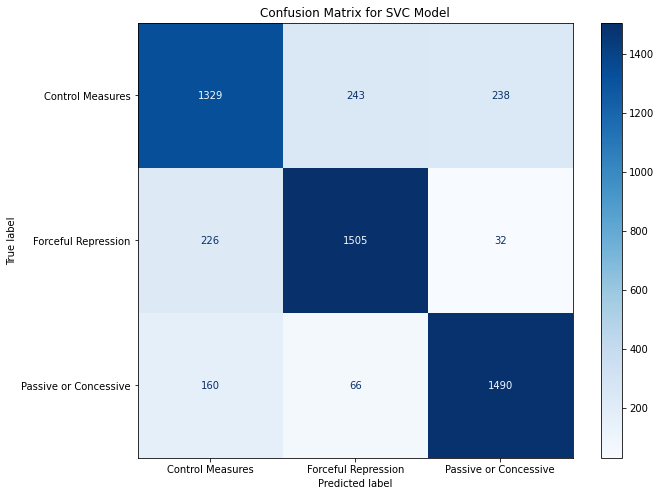

In [33]:
# Compute and plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_svc)
fig, ax = plt.subplots(figsize=(10, 8))  # Increase the size here
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_test))
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVC Model')
plt.show()


Summary

The SVC model shows strong discriminative power with high AUC values across all classes.

- **Control Measures:** AUC = 0.88
- **Forceful Repression:** AUC = 0.95
- **Passive or Concessive:** AUC = 0.95

Explanation of Visualizations

ROC and PR Curves

1. **ROC Curves (Top):**
   - The ROC curves illustrate the trade-off between the true positive rate (TPR) and false positive rate (FPR) for each class.
   - The AUC (Area Under the Curve) values reflect the model's discriminative power.
     - **Control Measures** (Class 0): AUC = 0.88 (Blue Line)
     - **Forceful Repression** (Class 1): AUC = 0.95 (Orange Line)
     - **Passive or Concessive** (Class 2): AUC = 0.95 (Green Line)
   - Higher AUC values indicate better performance of the model in distinguishing between classes.

2. **PR Curves (Bottom):**
   - The PR (Precision-Recall) curves show the precision against recall for each class, useful for evaluating models on imbalanced datasets.
   - High AUC values in PR curves indicate high precision and recall, meaning the model can identify relevant instances effectively.
     - **Control Measures** (Class 0): AUC = 0.79 (Blue Line)
     - **Forceful Repression** (Class 1): AUC = 0.88 (Orange Line)
     - **Passive or Concessive** (Class 2): AUC = 0.89 (Green Line)

Confusion Matrix

The confusion matrix provides a detailed breakdown of the model's classification performance by showing the actual versus predicted labels.

- **True Positives (Diagonal Elements):** Correctly predicted instances.
  - **Control Measures:** 1329
  - **Forceful Repression:** 1505
  - **Passive or Concessive:** 1490

- **False Positives and False Negatives (Off-Diagonal Elements):** Instances where the model misclassified the labels.
  - Misclassified as **Control Measures:** 243 (from Forceful Repression), 238 (from Passive or Concessive)
  - Misclassified as **Forceful Repression:** 226 (from Control Measures), 32 (from Passive or Concessive)
  - Misclassified as **Passive or Concessive:** 160 (from Control Measures), 66 (from Forceful Repression)

Conclusion

The SVC model demonstrates robust classification performance with high accuracy and an excellent ability to distinguish between classes. The high AUC values across ROC and PR curves indicate the model's strong discriminative power, and the confusion matrix reflects a high number of correct predictions with relatively few misclassifications. This analysis underscores the model's effectiveness in classifying instances across the given categories.


**Best Performing Model.**
- XGBoost is recommended as the better model based on the following points:
 - It has higher ROC AUC scores, indicating better performance in distinguishing between classes.
 - It has higher Precision-Recall AUC scores, which is crucial for handling imbalanced datasets.
 - Though the overall accuracy is slightly lower than SVC, the more robust ROC and PR curves suggest better generalization and reliability.

Despite SVC having a marginally higher test accuracy, XGBoost's superior ROC and PR metrics make it the preferred choice for this classification task.

In [39]:
joblib.dump(label_encoder, 'label_encoder_region.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le, 'target_encoder.pkl')
joblib.dump(xgb_clf, 'xgboost_model.pkl')

['xgboost_model.pkl']

In [40]:
import sys
print("Python version:", sys.version)


Python version: 3.8.5 | packaged by conda-forge | (default, Sep 24 2020, 16:20:24) [MSC v.1916 64 bit (AMD64)]
